In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.system("cp pixelTrain400new.h5 pixelTrainCopy.h5 ")
df = pd.HDFStore("pixelTrainCopy.h5", 'r')
os.system("rm pixelTrainCopy.h5")


0

In [3]:
df = df.select("df",stop=-1)
df = df[(df["GenDeltaR"]<0.1) & (df["nUniqueSimTracksInSharedHit"]>-1)]
df = df[(df["isSharedHit"]>0)]

In [4]:
# Select only useful data
cols = ['isSharedHit','trackPt','trackEta','trackPhi','nUniqueSimTracksInSharedHit',  'uniqueSharedSimTrackPDGIds', 'uniqueProtonSimTrackPDGIds', 'uniquePionSimTrackPDGIds', 'GenDeltaR', 'GenProtonDeltaR', 'GenPionDeltaR', 'sharedHitContainsGenLambda', 'sharedHitContainsGenProton', 'sharedHitContainsGenPion', 'GenLambdaVtxPosx', 'GenLambdaVtxPosy','GenLambdaVtxPosz']
df = df[cols]
df


,isSharedHit,trackPt,trackEta,trackPhi,nUniqueSimTracksInSharedHit,uniqueSharedSimTrackPDGIds,uniqueProtonSimTrackPDGIds,uniquePionSimTrackPDGIds,GenDeltaR,GenProtonDeltaR,GenPionDeltaR,sharedHitContainsGenLambda,sharedHitContainsGenProton,sharedHitContainsGenPion,GenLambdaVtxPosx,GenLambdaVtxPosy,GenLambdaVtxPosz
12,1,5.279681,-0.096392,5.279681,1.0,[2212],NaN,NaN,0.001625,0.000814,0.000810,False,True,False,[-0.74408787540306],[-3.150673301674079],[-1.1982614138682013]
17,1,1.294619,0.825009,1.294619,2.0,"[11, -11]",NaN,NaN,0.079373,0.058059,0.021314,False,False,False,[73.34204216968126],[-56.08923628687054],[86.69873273269661]
20,1,7.686522,-0.914772,7.686522,2.0,"[-2212, 211]",[],[],0.002210,0.000161,0.002050,False,True,True,"[-2.1517641434103023, -55.83635207560083]","[-1.4380103230346633, -33.347480950496475]","[-6.63614688632684, -70.58661157337966]"
27,1,1.644026,1.796040,1.644026,2.0,"[211, -2212]",NaN,NaN,0.016918,0.001488,0.015430,False,True,True,[-2.8945302628083285],[-0.6992278180287915],[15.34021478651753]
36,1,2.754200,-1.903400,2.754200,2.0,"[-211, 2212]",NaN,NaN,0.011995,0.002076,0.009919,False,True,True,[1.3885328847685503],[2.3960586449990675],[-12.167520158283278]
44,1,6.247725,-1.407947,6.247725,2.0,"[-211, 2212]",NaN,NaN,0.001147,0.000633,0.000514,False,True,True,[2.7996897692132747],[1.251285296064154],[-6.481940835838522]
57,1,1.645439,1.796361,1.645439,2.0,"[211, -2212]",NaN,NaN,0.015990,0.001201,0.014788,False,True,True,[-2.8945302628083285],[-0.6992278180287915],[15.34021478651753]
81,1,6.264533,-1.408100,6.264533,2.0,"[-211, 2212]",NaN,NaN,0.001034,0.000743,0.000291,False,True,True,[2.7996897692132747],[1.251285296064154],[-6.481940835838522]
98,1,5.289252,-0.096428,5.289252,1.0,[2212],[],[],0.001670,0.000617,0.001053,False,True,False,"[-0.74408787540306, -55.07970699567604]","[-3.150673301674079, -129.82491423255686]","[-1.1982614138682013, -13.883744005725168]"
108,1,1.641367,1.796676,1.641367,2.0,"[211, -2212]",NaN,NaN,0.015597,0.000919,0.014678,False,True,True,[-2.8945302628083285],[-0.6992278180287915],[15.34021478651753]


In [5]:
df = df[df["nUniqueSimTracksInSharedHit"]>-1]

dfshared = df[df['nUniqueSimTracksInSharedHit']>0]
dfmerged = dfshared[dfshared['nUniqueSimTracksInSharedHit']>1]
dfnotmerged = dfshared[dfshared['nUniqueSimTracksInSharedHit'] == 1]

dfsharedprotonpion = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == True)]
dfsharedprotononly = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == True)]
dfsharedpiononly = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == False)]
dfsharedlambda = dfshared[(dfshared['sharedHitContainsGenLambda'] == True)]
dfsharedother = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['sharedHitContainsGenLambda'] == False)]

dfmergedprotonpion = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == True) & (dfshared['nUniqueSimTracksInSharedHit']>1)]
dfmergedprotononly = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == True) & (dfshared['nUniqueSimTracksInSharedHit']>1)]
dfmergedpiononly = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['nUniqueSimTracksInSharedHit']>1)]
dfmergedlambda = dfshared[(dfshared['sharedHitContainsGenLambda'] == True) & dfshared['nUniqueSimTracksInSharedHit']>1]
dfmergedother = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['sharedHitContainsGenLambda'] == False) & (dfshared['nUniqueSimTracksInSharedHit']>1)]

dfnotmergedprotonpion = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == True) & (dfshared['nUniqueSimTracksInSharedHit']==1)]
dfnotmergedprotononly = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == True) & (dfshared['nUniqueSimTracksInSharedHit']==1)]
dfnotmergedpiononly = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['nUniqueSimTracksInSharedHit']==1)]
dfnotmergedlambda = dfshared[(dfshared['sharedHitContainsGenLambda'] == True) & dfshared['nUniqueSimTracksInSharedHit']==1]
dfnotmergedother = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['sharedHitContainsGenLambda'] == False) & (dfshared['nUniqueSimTracksInSharedHit']==1)]


dftruth = dfnotmerged[dfnotmerged['GenDeltaR']<0.1]
dftruthtwo = dfshared[(dfshared['nUniqueSimTracksInSharedHit'] == 2) & (dfshared['GenDeltaR'] < 0.1)]



# 1 and 2 sim tracks shared hits for Truth Investigations

dfonesim = dfshared[(dfshared['nUniqueSimTracksInSharedHit'] == 1) & (dfshared['GenDeltaR'] < 0.1)]
dftwosim = dftruthtwo[(dftruthtwo['sharedHitContainsGenProton']==True) & (dftruthtwo['sharedHitContainsGenPion']==True)]

dfoneselect = dfonesim[(dfonesim['GenLambdaVtxPosx'].str.len()==1)]
genLambdaXone = dfoneselect['GenLambdaVtxPosx'].str[0]
genLambdaYone = dfoneselect['GenLambdaVtxPosy'].str[0]
genLambdaZone = dfoneselect['GenLambdaVtxPosz'].str[0]

dftwoselect = dftwosim[(dftwosim['GenLambdaVtxPosx'].str.len()==1)]
genLambdaXtwo = dftwoselect['GenLambdaVtxPosx'].str[0]
genLambdaYtwo = dftwoselect['GenLambdaVtxPosy'].str[0]
genLambdaZtwo = dftwoselect['GenLambdaVtxPosz'].str[0]

In [6]:
print("Shared, TOTAL: %i" %(len(dfshared)))
print("")
print("Shared, Proton AND Pion: %i" %(len(dfsharedprotonpion)))
print("Shared, Proton Only: %i" %(len(dfsharedprotononly)))
print("Shared, Pion Only: %i" %(len(dfsharedpiononly)))
print("Shared, Contains Lambda: %i" %(len(dfsharedlambda)))
print("Shared, Other: %i" %(len(dfsharedother)))

print("")
print("")
print("Merged, TOTAL: %i" %(len(dfmerged)))
print("")
print("Merged, Proton AND Pion: %i" %(len(dfmergedprotonpion)))
print("Merged, Proton Only: %i" %(len(dfmergedprotononly)))
print("Merged, Pion Only: %i" %(len(dfmergedpiononly)))
print("Merged, ContainsLambda: %i" %(len(dfmergedlambda)))
print("Merged, Other: %i" %(len(dfmergedother)))
print("")
print("")
print("Not Merged, TOTAL: %i" %(len(dfnotmerged)))
print("")
print("Not Merged, Proton AND Pion: %i" %(len(dfnotmergedprotonpion)))
print("Not Merged, Proton Only: %i" %(len(dfnotmergedprotononly)))
print("Not Merged, Pion Only: %i" %(len(dfnotmergedpiononly)))
print("Not Merged, Contains Lambda: %i" %(len(dfnotmergedlambda)))
print("Not Merged, Other: %i" %(len(dfnotmergedother)))



Shared, TOTAL: 12297

Shared, Proton AND Pion: 7260
Shared, Proton Only: 2430
Shared, Pion Only: 338
Shared, Contains Lambda: 5
Shared, Other: 2264


Merged, TOTAL: 8338

Merged, Proton AND Pion: 7260
Merged, Proton Only: 42
Merged, Pion Only: 34
Merged, ContainsLambda: 0
Merged, Other: 1001


Not Merged, TOTAL: 3959

Not Merged, Proton AND Pion: 0
Not Merged, Proton Only: 2388
Not Merged, Pion Only: 304
Not Merged, Contains Lambda: 5
Not Merged, Other: 1263


In [7]:
pd.set_option('display.max_colwidth', -1)
dfshared[dfshared['nUniqueSimTracksInSharedHit']>4]

,isSharedHit,trackPt,trackEta,trackPhi,nUniqueSimTracksInSharedHit,uniqueSharedSimTrackPDGIds,uniqueProtonSimTrackPDGIds,uniquePionSimTrackPDGIds,GenDeltaR,GenProtonDeltaR,GenPionDeltaR,sharedHitContainsGenLambda,sharedHitContainsGenProton,sharedHitContainsGenPion,GenLambdaVtxPosx,GenLambdaVtxPosy,GenLambdaVtxPosz
4743,1,12.176561,-1.160228,12.176561,6.0,"[211, 211, 211, -211, -211, -211]",NaN,NaN,0.081814,0.064018,0.017795,False,False,False,"[-57.63245566699808, -57.63245566699808]","[-70.72046224989978, -70.72046224989978]","[-138.63663791496552, -138.63663791496552]"
5918,1,9.094035,-1.260080,9.094035,7.0,"[-211, 211, -211, 211, -321, 321, -211]",NaN,NaN,0.065098,0.025801,0.039297,False,False,False,[8.724544226180587],[-18.12582734066475],[-27.51516861927995]
37499,1,8.813766,-1.078662,8.813766,25.0,"[-211, -211, -2212, 211, 211, -211, 211, -211, 2212, -211, 2212, 211, 211, 211, -211, -211, 211, -211, 211, 211, 211, -211, -211, 211, 3122]",[],[],0.038111,0.028147,0.009964,False,False,False,"[61.19380391178631, 61.19380391178631, 61.19380391178631]","[16.425692234820065, 16.425692234820065, 16.425692234820065]","[-78.96653407306081, -78.96653407306081, -78.96653407306081]"
41970,1,14.471259,-2.232536,14.471259,5.0,"[211, -211, 2212, -321, -211]",[],[],0.002233,0.000149,0.002084,False,True,True,"[-1.43985565363923, 33.83436147854108]","[-1.4269329901615417, 42.01750994655916]","[-6.649163638770138, -5.090178760121624]"
47713,1,8.833895,-1.078461,8.833895,25.0,"[-211, -211, -2212, 211, 211, 211, 211, 211, 2212, -211, -211, 211, 211, -211, -211, 211, 211, -211, 211, -211, -211, 211, 2212, -211, 3122]",[],[],0.037972,0.027939,0.010033,False,False,False,"[61.19380391178631, 61.19380391178631]","[16.425692234820065, 16.425692234820065]","[-78.96653407306081, -78.96653407306081]"
49969,1,12.298740,0.753012,12.298740,6.0,"[211, 211, -321, 211, -2212, -211]",NaN,NaN,0.049257,0.015666,0.033591,False,False,False,[11.116195479002622],[-12.860250273872671],[12.971567287571238]
51123,1,28.433708,-1.178360,28.433708,5.0,"[-211, 211, -2212, 211, -211]",NaN,NaN,0.001606,0.000269,0.001337,False,True,True,[0.7556978077553165],[2.371320859741312],[-2.6181076455661123]
51143,1,5.717419,0.955160,5.717419,5.0,"[211, 321, -211, -211, 321]",[],[],0.070504,0.052332,0.018172,False,False,False,"[-4.472916250158982, -8.655139032196013]","[2.0453706111597105, -2.316416427024234]","[6.556621579154511, 14.419994641761965]"
51146,1,25.582429,0.142316,25.582429,9.0,"[211, -211, 211, -211, 2212, 211, -211, 211, -321]",NaN,NaN,0.040969,0.021752,0.019217,False,False,False,[85.09462574370824],[-134.34209442834742],[25.529043700809936]
51415,1,8.806905,0.403453,8.806905,7.0,"[2212, 211, 211, -211, 211, 211, -211]",NaN,NaN,0.027796,0.002516,0.025280,False,False,False,[-0.9441278959629111],[-27.875468775940135],[18.13116753708443]


In [8]:
def plotGenDeltaR(df, title):
    
    df = df[df['GenDeltaR']<0.1]

    plt.rcParams.update({'font.size': 14})
    
    interval = 0.002
    offset = interval/2
    
    xAxis = np.arange(0, 0.12, interval*10)
    xBins = np.arange(0, 0.12, interval)
    
    fig= plt.figure(figsize=(10,3))
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(df['GenProtonDeltaR'], bins = xBins, label='Proton', alpha = 0.7, color = 'b', align='left')
    plt.xticks(xAxis)
    plt.xlabel('$\Delta$ R')
    plt.ylabel('Number of hits')
    plt.title('%s Hit, Proton GenDeltaR' %(title))
    ax.set_xticks(xBins - offset, minor=True)
    ax.xaxis.grid(True, which='minor')
    plt.show()

    fig= plt.figure(figsize=(10,3)) 
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(df['GenPionDeltaR'], bins = xBins, label='Pion', alpha = 0.7, color = 'r', align='left')
    plt.xticks(xAxis)
    plt.xlabel('$\Delta$ R')
    plt.ylabel('Number of hits')
    plt.title('%s Hit, Pion GenDeltaR' %(title))
    ax.set_xticks(xBins - offset, minor=True)
    ax.xaxis.grid(True, which='minor')
    plt.show()

    fig= plt.figure(figsize=(10,3)) 
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(df['GenDeltaR'], bins = xBins, label='Lambda', alpha = 0.7, color = 'g', align='left')
    plt.xticks(xAxis)
    plt.xlabel('$\Delta$ R')
    plt.ylabel('Number of hits')
    plt.title('%s Hit, Lambda GenDeltaR' %(title))
    ax.set_xticks(xBins - offset, minor=True)
    ax.xaxis.grid(True, which='minor')
    plt.show()

Total Shared Hits: 12297


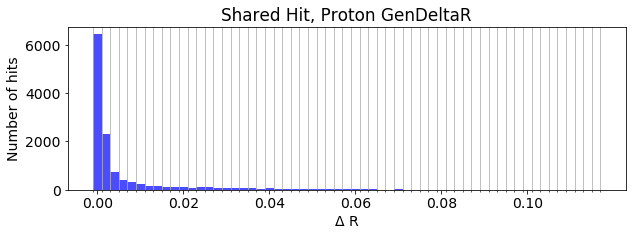

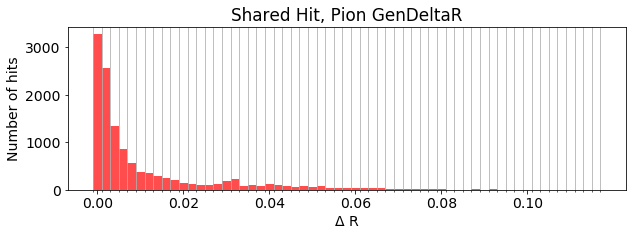

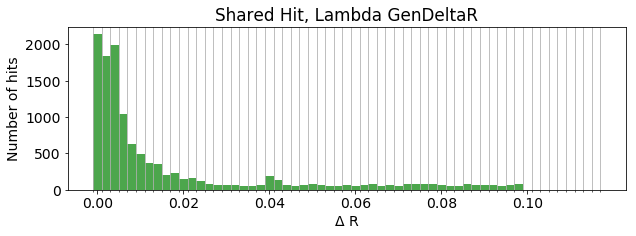

In [112]:
print("Total Shared Hits: %i" %(len(dfshared)))
plotGenDeltaR(dfshared, 'Shared')

Total Merged Hits: 8338


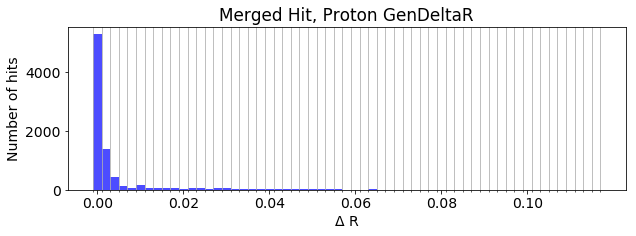

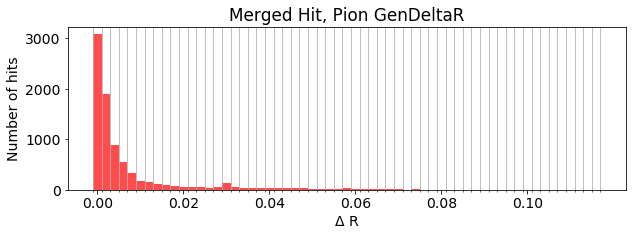

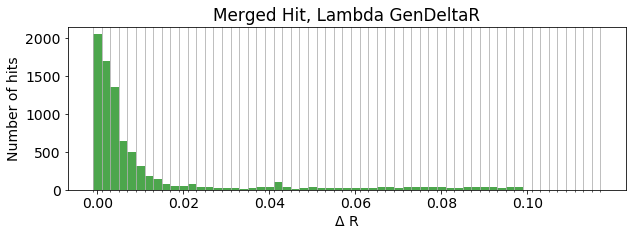

In [10]:
print("Total Merged Hits: %i" %(len(dfmerged)))
plotGenDeltaR(dfmerged, 'Merged')

Total Shared Hits with 1 Sim Track: 3959


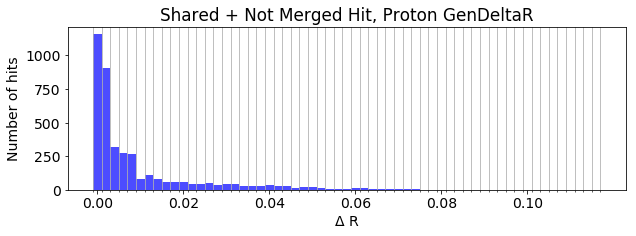

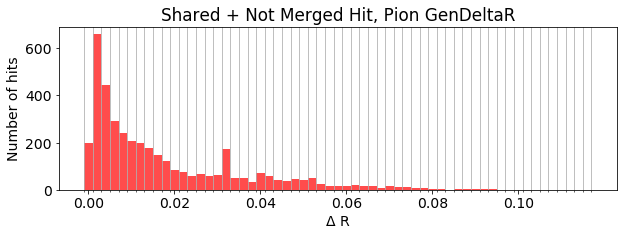

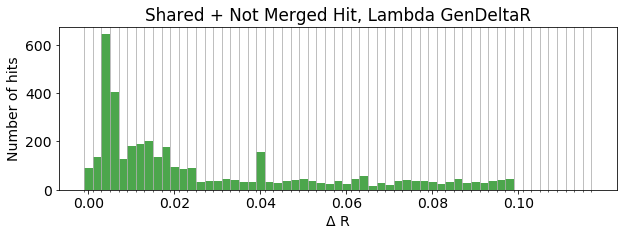

In [11]:
print("Total Shared Hits with 1 Sim Track: %i" %(len(dfnotmerged)))
plotGenDeltaR(dfnotmerged, 'Shared + Not Merged')

Total Shared Hits with Proton AND Pion: 7260


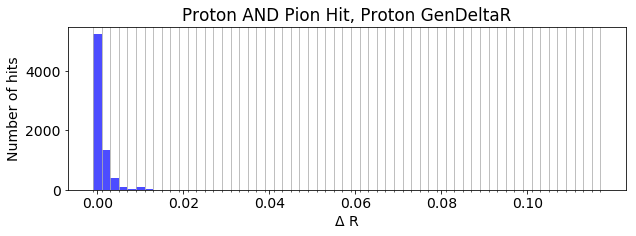

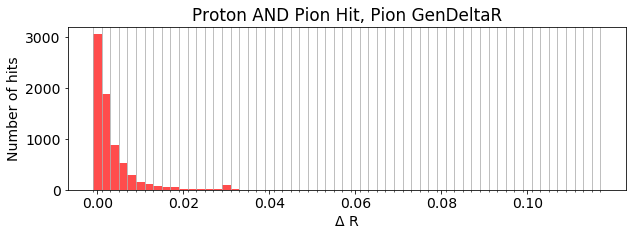

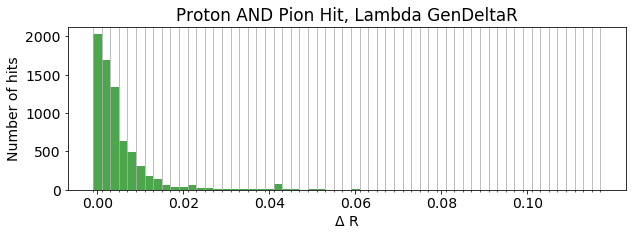

In [12]:
print("Total Shared Hits with Proton AND Pion: %i" %(len(dfsharedprotonpion)))
plotGenDeltaR(dfsharedprotonpion, 'Proton AND Pion')

Total Shared Hits with Proton Only: 2430


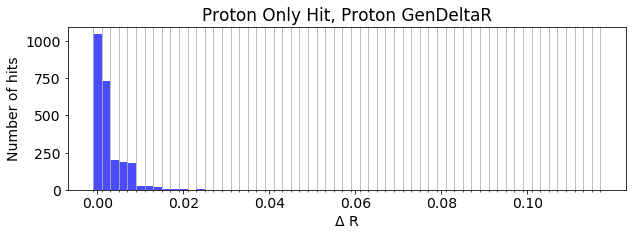

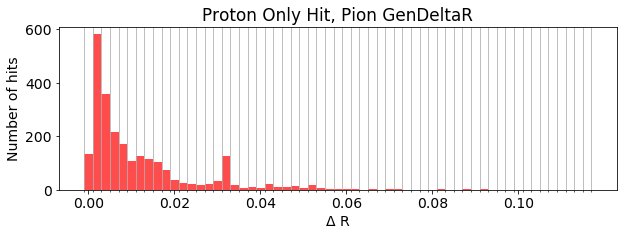

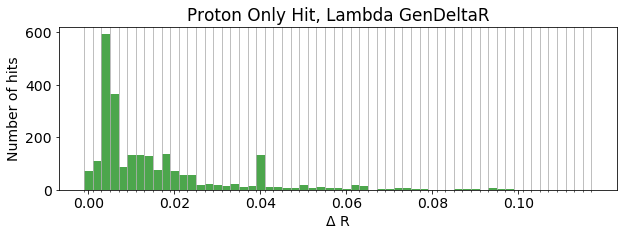

In [13]:
print("Total Shared Hits with Proton Only: %i" %(len(dfsharedprotononly)))
plotGenDeltaR(dfsharedprotononly, 'Proton Only')

Total Shared Hits with Pion Only: 338


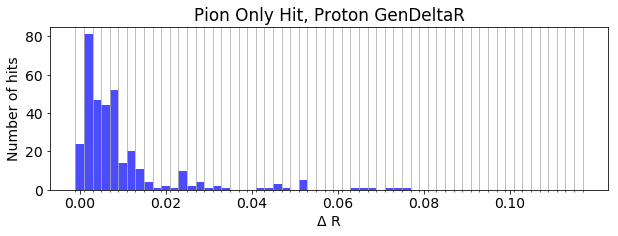

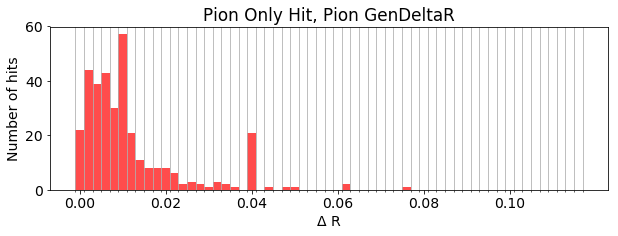

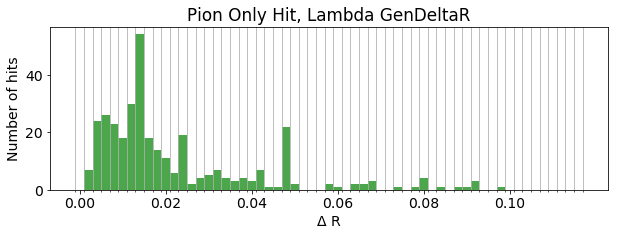

In [14]:
print("Total Shared Hits with Pion Only: %i" %(len(dfsharedpiononly)))
plotGenDeltaR(dfsharedpiononly, 'Pion Only')

Total Shared Hits Containing Lambda: 5


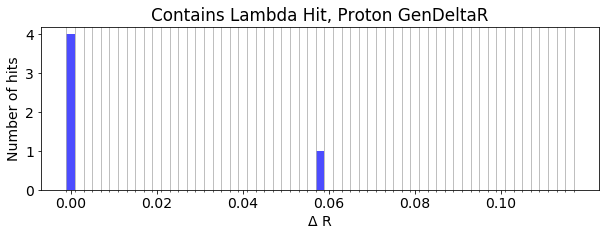

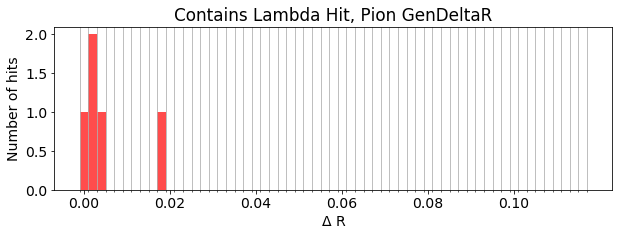

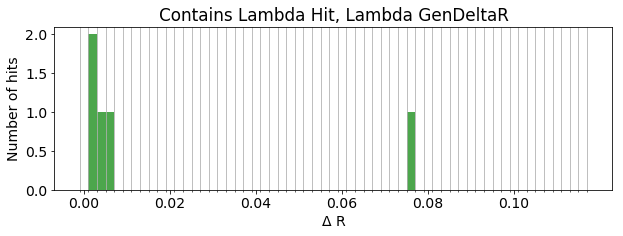

In [15]:
print("Total Shared Hits Containing Lambda: %i" %(len(dfsharedlambda)))
plotGenDeltaR(dfsharedlambda, 'Contains Lambda')

Total Shared Hits Containing 1 Sim Track: 3959


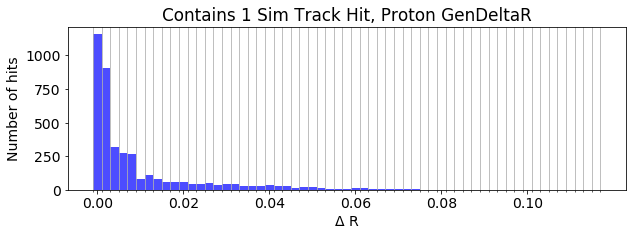

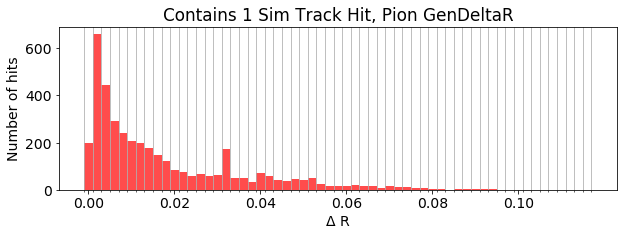

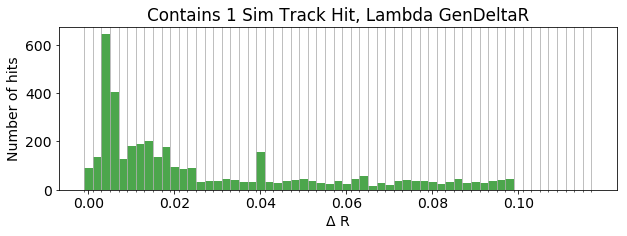

In [113]:
print("Total Shared Hits Containing 1 Sim Track: %i" %(len(dfonesim)))
plotGenDeltaR(dfonesim, 'Contains 1 Sim Track')

Total Shared Hits Containing 2 Sim Tracks: 7014


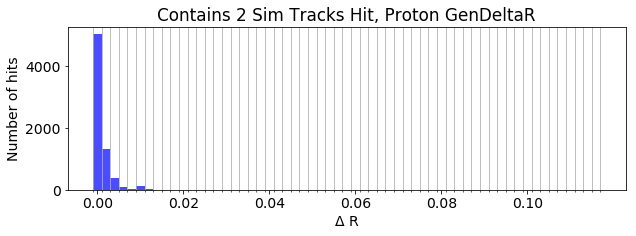

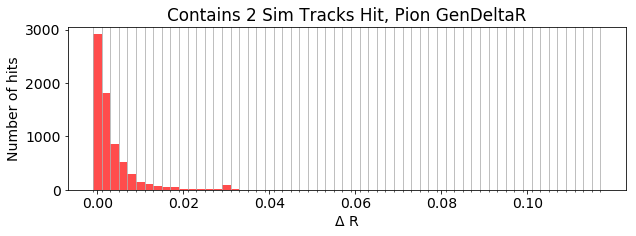

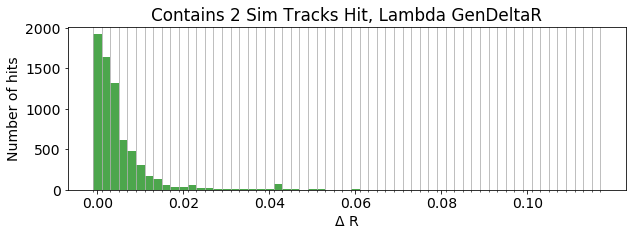

In [115]:
print("Total Shared Hits Containing 2 Sim Tracks: %i" %(len(dftwosim)))
plotGenDeltaR(dftwosim, 'Contains 2 Sim Tracks')

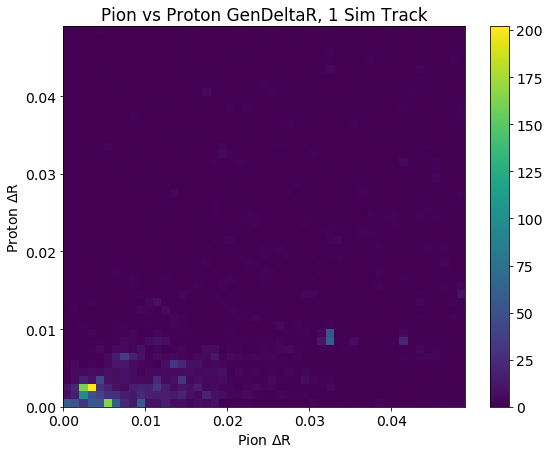

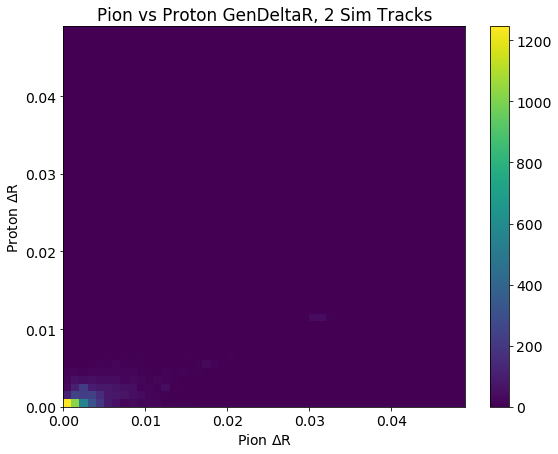

In [9]:
protondROneSim = dfonesim['GenProtonDeltaR']
piondROneSim = dfonesim['GenPionDeltaR']
protondRTwoSim = dftwosim['GenProtonDeltaR']
piondRTwoSim = dftwosim['GenPionDeltaR']


plt.rcParams.update({'font.size': 14})
    
interval = 0.001
offset = interval/2

xAxis = np.arange(0, 0.05, interval*10)
xBins = np.arange(0, 0.05, interval)

fig= plt.figure(figsize=(9,7))
ax = fig.add_subplot(1, 1, 1)
plt.hist2d(piondROneSim, protondROneSim, xBins)
plt.xlabel('Pion $\Delta$R')
plt.ylabel('Proton $\Delta$R')
plt.title('Pion vs Proton GenDeltaR, 1 Sim Track')
plt.colorbar()
plt.show()

# xBins = np.arange(0, 0.02, interval)
fig= plt.figure(figsize=(9,7))
ax = fig.add_subplot(1, 1, 1)
plt.hist2d(piondRTwoSim, protondRTwoSim, xBins)
plt.xlabel('Pion $\Delta$R')
plt.ylabel('Proton $\Delta$R')
plt.title('Pion vs Proton GenDeltaR, 2 Sim Tracks')
plt.colorbar()
plt.show()



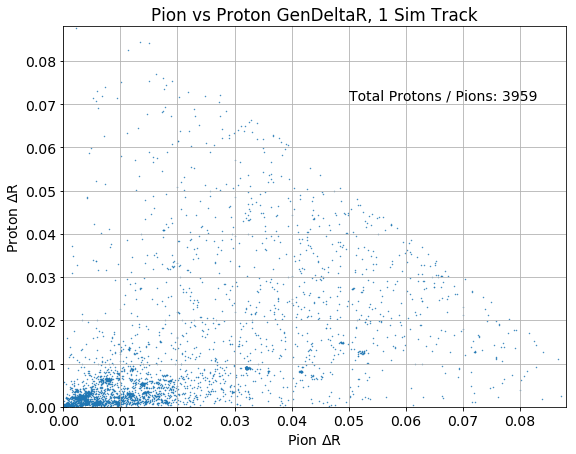

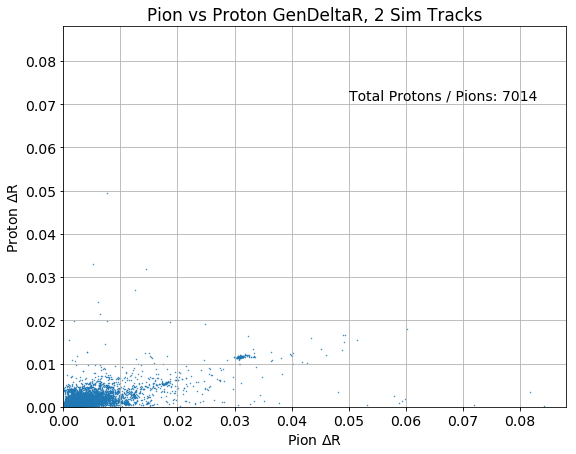

In [10]:
protondROneSim = dfonesim['GenProtonDeltaR']
piondROneSim = dfonesim['GenPionDeltaR']
protondRTwoSim = dftwosim['GenProtonDeltaR']
piondRTwoSim = dftwosim['GenPionDeltaR']


plt.rcParams.update({'font.size': 14})

fig= plt.figure(figsize=(9,7))
ax = fig.add_subplot(1, 1, 1)

xBins = np.arange(0, 0.09, 0.01)
ax.set_xticks(xBins, minor=True)
ax.xaxis.grid(True, which='minor')
ax.set_yticks(xBins, minor=True)
ax.yaxis.grid(True, which='minor')

plt.scatter(piondROneSim, protondROneSim, s=0.2)
plt.xlabel('Pion $\Delta$R')
plt.ylabel('Proton $\Delta$R')
plt.ylim([0, 0.088])
plt.xlim([0, 0.088])
plt.title('Pion vs Proton GenDeltaR, 1 Sim Track')
plt.text(0.05, 0.071, "Total Protons / Pions: %i" %(len(dfonesim)))


    
plt.show()

fig= plt.figure(figsize=(9,7))
ax = fig.add_subplot(1, 1, 1)

xBins = np.arange(0, 0.09, 0.01)
ax.set_xticks(xBins, minor=True)
ax.xaxis.grid(True, which='minor')
ax.set_yticks(xBins, minor=True)
ax.yaxis.grid(True, which='minor')

plt.scatter(piondRTwoSim, protondRTwoSim, s=0.2)
plt.xlabel('Pion $\Delta$R')
plt.ylabel('Proton $\Delta$R')
plt.title('Pion vs Proton GenDeltaR, 2 Sim Tracks')
plt.ylim([0, 0.088])
plt.xlim([0, 0.088])
plt.text(0.05, 0.071, "Total Protons / Pions: %i" %(len(dftwosim)))

plt.show()



In [11]:
def plotFreq(truthFreq, title):

    plt.rcParams.update({'font.size': 11})

    xRange = len(truthFreq)
    
    fig= plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    plt.xlabel('pdgID')
    plt.ylabel('Number of hits')
    plt.title(title)
    truthFreq.plot(kind='bar', color=['black', 'blue', 'red', 'green'])
    
    plt.ylim(top=truthFreq.max()+50)
    
    for i, v in enumerate(truthFreq):
        if v == None:
            continue
        plt.text(i, v+20, " "+str(v), color='black', va='center', ha='center')     
    
    xAxis = np.arange(xRange)
    ax.set_xticks(xAxis - 0.5, minor=True)
    ax.xaxis.grid(True, which='minor')
    plt.show()
    

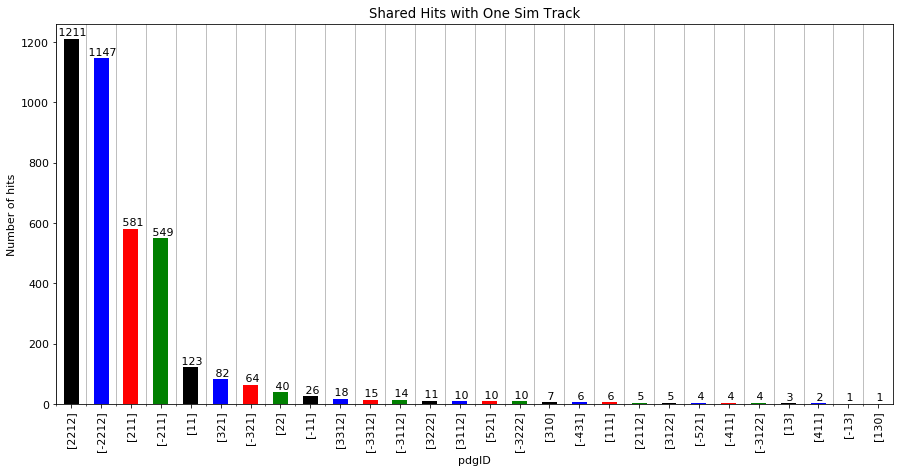

In [17]:
truthFreq = dftruth['uniqueSharedSimTrackPDGIds'].value_counts()
plotFreq(truthFreq, 'Shared Hits with One Sim Track')


In [13]:
def plotLambdaScatter(df, title):
    plt.rcParams.update({'font.size': 12})

    titleFull = title + " Full View"
    dfselect = df[(df['GenLambdaVtxPosx'].str.len()==1)]
    
    genLambdaX = dfselect['GenLambdaVtxPosx'].str[0]
    genLambdaY = dfselect['GenLambdaVtxPosy'].str[0]
    
    if len(genLambdaX) != len(genLambdaY):
        raise Exception('The x and y position vectors should have the same shape.')
    
    fig= plt.figure(figsize=(10,10))
    plt.scatter(genLambdaX, genLambdaY, s=0.5)
    plt.xlim([-5, 5]) 
    plt.ylim([-5, 5])
    plt.xlabel('X Position (cm)')
    plt.ylabel('Y Position (cm)')
    plt.title(title)
    plt.show()
    
    fig= plt.figure(figsize=(10,10))
    plt.scatter(genLambdaX, genLambdaY, s=0.5)
    plt.xlim([-10, 10]) 
    plt.ylim([-10, 10]) 
    plt.xlabel('X Position (cm)')
    plt.ylabel('Y Position (cm)')
    plt.title(titleFull)
    plt.show()
    
    

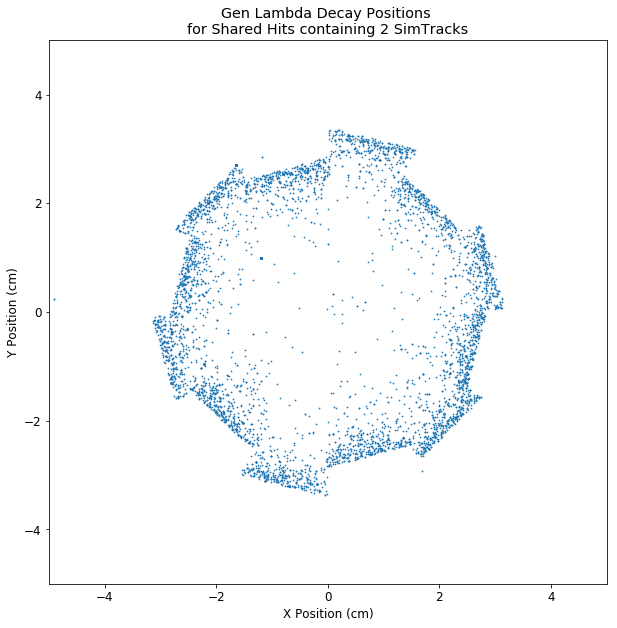

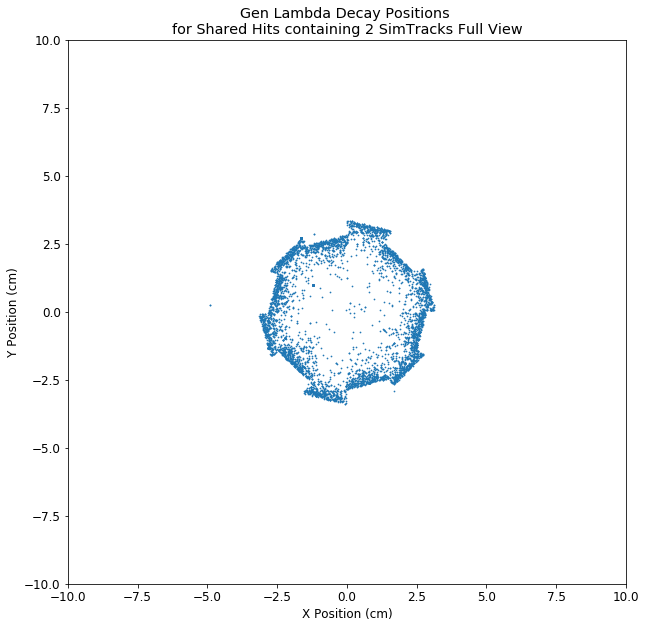

In [26]:
plotLambdaScatter(dftwosim, "Gen Lambda Decay Positions \nfor Shared Hits containing 2 SimTracks")

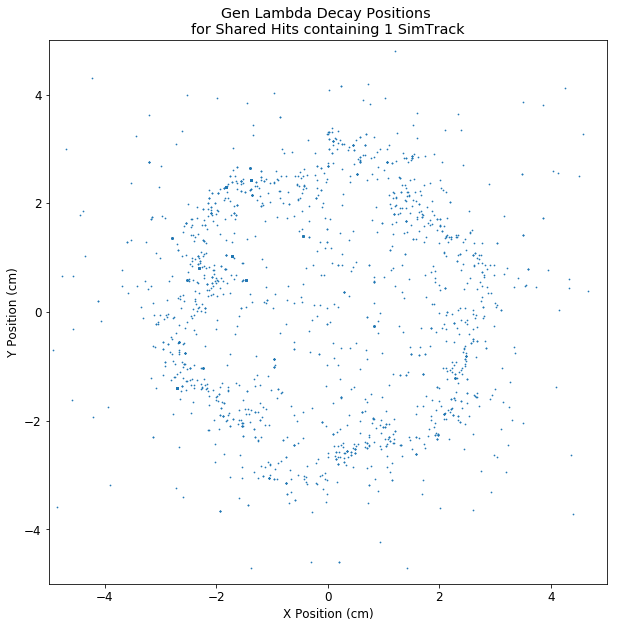

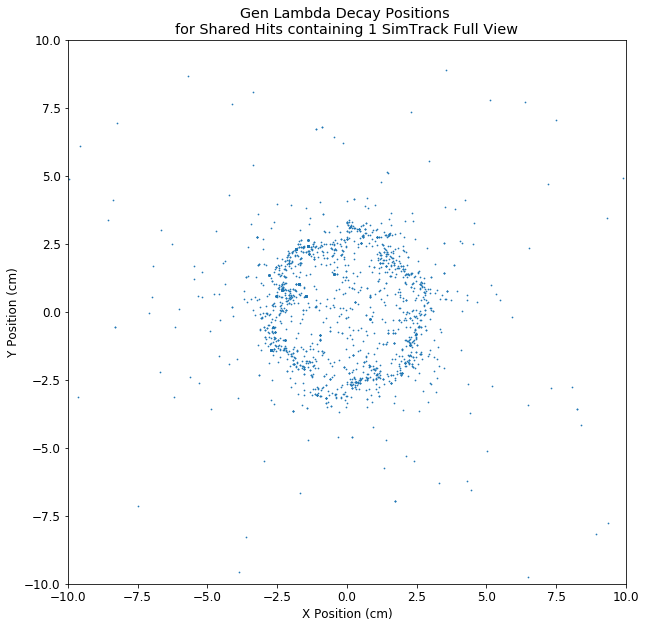

In [27]:
plotLambdaScatter(dfonesim, "Gen Lambda Decay Positions \nfor Shared Hits containing 1 SimTrack")

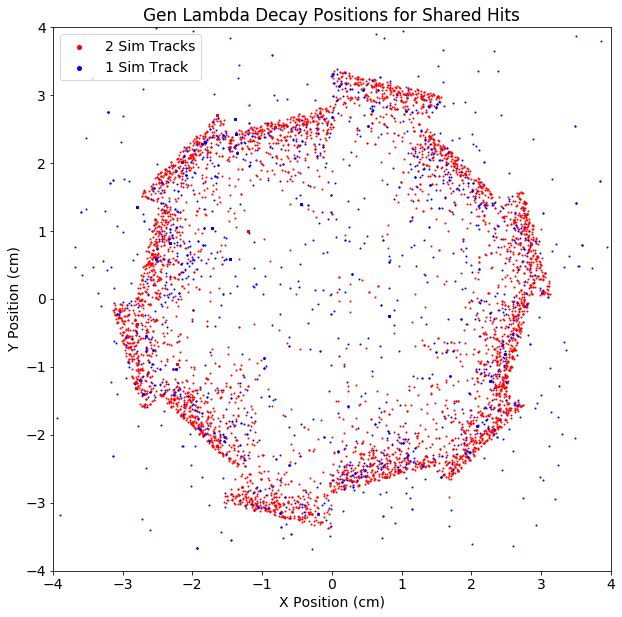

In [26]:
plt.rcParams.update({'font.size': 14})

fig= plt.figure(figsize=(10,10))
plt.scatter(genLambdaXtwo, genLambdaYtwo, s=1, c='r', alpha=1, label='2 Sim Tracks')
plt.scatter(genLambdaXone, genLambdaYone, s=1, c='b', alpha=1, label='1 Sim Track')

limits = 4
plt.xlim([-limits, limits]) 
plt.ylim([-limits, limits]) 
plt.xlabel('X Position (cm)')
plt.ylabel('Y Position (cm)')
plt.title("Gen Lambda Decay Positions for Shared Hits")

plt.rcParams["legend.markerscale"] = 4.0
plt.legend()
plt.show()
plt.rcParams["legend.markerscale"] = 1.0

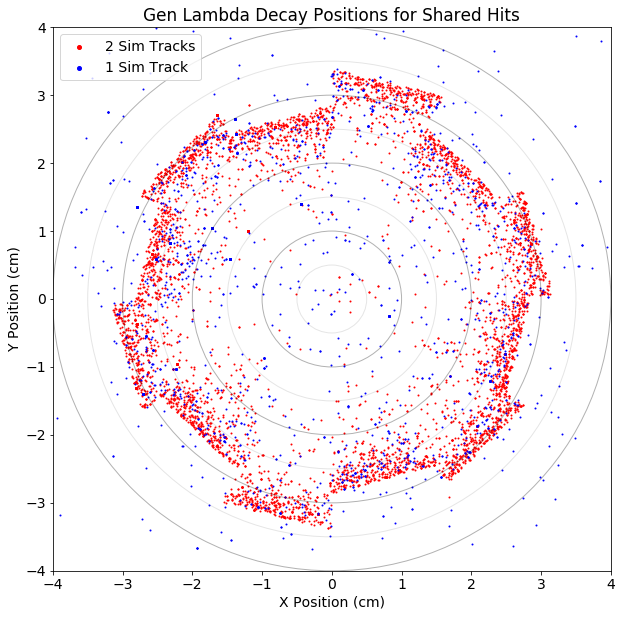

In [65]:


plt.rcParams.update({'font.size': 14})

fig= plt.figure(figsize=(10,10))

plt.scatter(genLambdaXtwo, genLambdaYtwo, s=1, c='r', alpha=1, label='2 Sim Tracks')
plt.scatter(genLambdaXone, genLambdaYone, s=1, c='b', alpha=1, label='1 Sim Track')

limits = 4

radii = np.arange(0, limits+1, 1)
for r in radii:
    plt.gcf().gca().add_artist(plt.Circle((0, 0), r, color='black', alpha=0.3, fill=False))

radiiMinor = np.arange(0.5, limits+0.5, 1)
for r in radiiMinor:
    plt.gcf().gca().add_artist(plt.Circle((0, 0), r, color='black', alpha=0.1, fill=False))    

plt.xlim([-limits, limits]) 
plt.ylim([-limits, limits]) 
plt.xlabel('X Position (cm)')
plt.ylabel('Y Position (cm)')
plt.title("Gen Lambda Decay Positions for Shared Hits")

plt.rcParams["legend.markerscale"] = 4.0
plt.legend()
plt.show()
plt.rcParams["legend.markerscale"] = 1.0


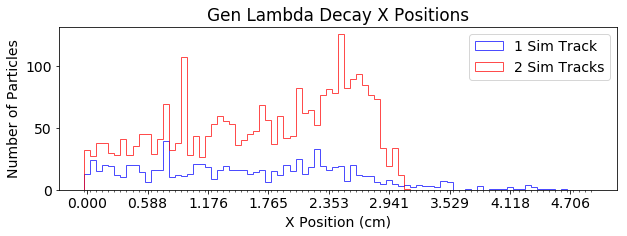

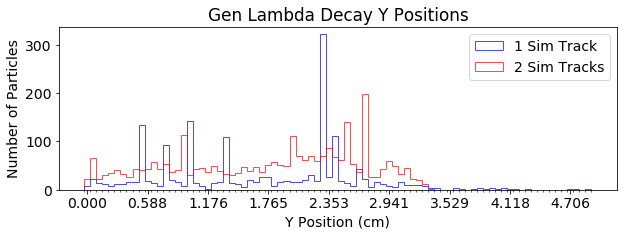

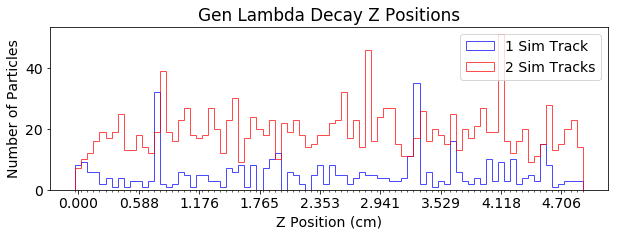

In [17]:
# Gen Lambda Decay Positions
plt.rcParams.update({'font.size': 14})
bins = 17.0
interval = 1/bins
offset = interval/2
xAxis = np.arange(0, 5, interval*10)
xBins = np.arange(0, 5, interval)



# X
fig= plt.figure(figsize=(10,3))
ax = fig.add_subplot(1, 1, 1)
plt.hist(genLambdaXone, bins = xBins, label='1 Sim Track', alpha = 0.7, align='left', color='b', histtype="step")
plt.hist(genLambdaXtwo, bins = xBins, label='2 Sim Tracks', alpha = 0.7, align='left', color='r', histtype="step")
plt.xticks(xAxis)
plt.xlabel('X Position (cm)')
plt.ylabel('Number of Particles')
plt.title("Gen Lambda Decay X Positions")
ax.set_xticks(xBins - offset, minor=True)
plt.legend()   
plt.show()

# Y
fig= plt.figure(figsize=(10,3))
ax = fig.add_subplot(1, 1, 1)
plt.hist(genLambdaYone, bins = xBins, label='1 Sim Track', alpha = 0.7, align='left', color='b', histtype="step")
plt.hist(genLambdaYtwo, bins = xBins, label='2 Sim Tracks', alpha = 0.7, align='left', color='r', histtype="step")
plt.xticks(xAxis)
plt.xlabel('Y Position (cm)')
plt.ylabel('Number of Particles')
plt.title("Gen Lambda Decay Y Positions")
ax.set_xticks(xBins - offset, minor=True)
plt.legend()   
plt.show()

# Z
fig= plt.figure(figsize=(10,3))
ax = fig.add_subplot(1, 1, 1)
plt.hist(genLambdaZone, bins = xBins, label='1 Sim Track', alpha = 0.7, align='left', color='b', histtype="step")
plt.hist(genLambdaZtwo, bins = xBins, label='2 Sim Tracks', alpha = 0.7, align='left', color='r', histtype="step")
plt.xticks(xAxis)
plt.xlabel('Z Position (cm)')
plt.ylabel('Number of Particles')
plt.title("Gen Lambda Decay Z Positions")
ax.set_xticks(xBins - offset, minor=True)
plt.legend()   
plt.show()




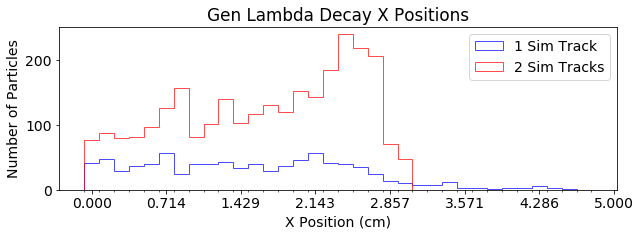

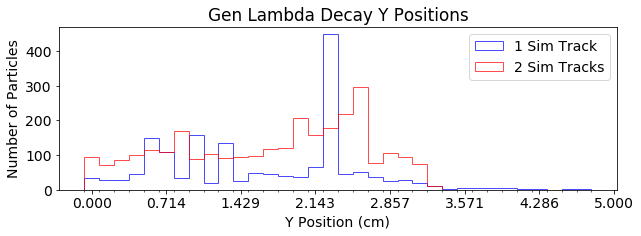

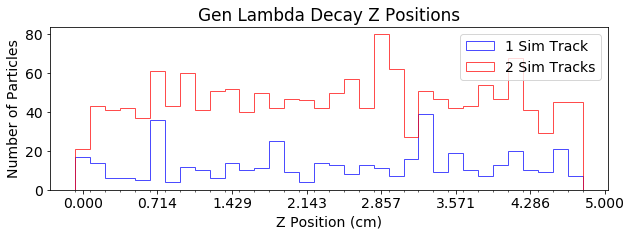

In [24]:
# Gen Lambda Decay Positions
plt.rcParams.update({'font.size': 14})
bins = 7.0
interval = 1/bins
offset = interval/2
xAxis = np.arange(0, 5, interval*5)
xBins = np.arange(0, 5, interval)



# X
fig= plt.figure(figsize=(10,3))
ax = fig.add_subplot(1, 1, 1)
plt.hist(genLambdaXone, bins = xBins, label='1 Sim Track', alpha = 0.7, align='left', color='b', histtype="step")
plt.hist(genLambdaXtwo, bins = xBins, label='2 Sim Tracks', alpha = 0.7, align='left', color='r', histtype="step")
plt.xticks(xAxis)
plt.xlabel('X Position (cm)')
plt.ylabel('Number of Particles')
plt.title("Gen Lambda Decay X Positions")
ax.set_xticks(xBins - offset, minor=True)
plt.legend()   
plt.show()

# Y
fig= plt.figure(figsize=(10,3))
ax = fig.add_subplot(1, 1, 1)
plt.hist(genLambdaYone, bins = xBins, label='1 Sim Track', alpha = 0.7, align='left', color='b', histtype="step")
plt.hist(genLambdaYtwo, bins = xBins, label='2 Sim Tracks', alpha = 0.7, align='left', color='r', histtype="step")
plt.xticks(xAxis)
plt.xlabel('Y Position (cm)')
plt.ylabel('Number of Particles')
plt.title("Gen Lambda Decay Y Positions")
ax.set_xticks(xBins - offset, minor=True)
plt.legend()   
plt.show()

# Z
fig= plt.figure(figsize=(10,3))
ax = fig.add_subplot(1, 1, 1)
plt.hist(genLambdaZone, bins = xBins, label='1 Sim Track', alpha = 0.7, align='left', color='b', histtype="step")
plt.hist(genLambdaZtwo, bins = xBins, label='2 Sim Tracks', alpha = 0.7, align='left', color='r', histtype="step")
plt.xticks(xAxis)
plt.xlabel('Z Position (cm)')
plt.ylabel('Number of Particles')
plt.title("Gen Lambda Decay Z Positions")
ax.set_xticks(xBins - offset, minor=True)
plt.legend()   
plt.show()




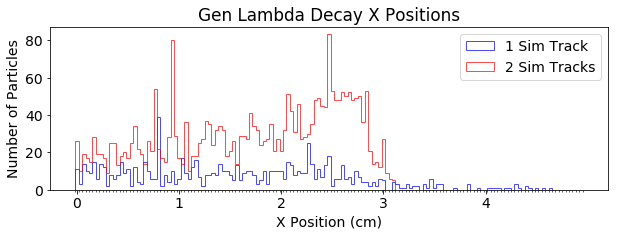

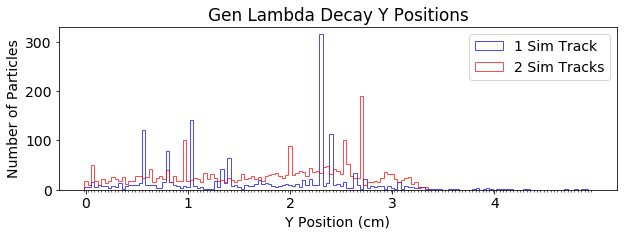

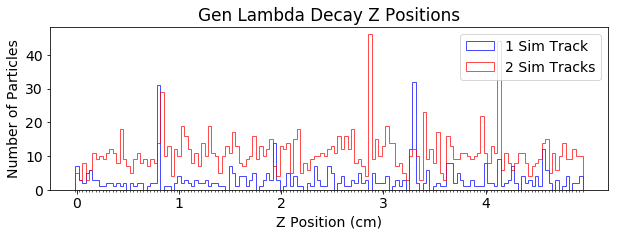

In [25]:
# Gen Lambda Decay Positions
plt.rcParams.update({'font.size': 14})
bins = 30.0
interval = 1/bins
offset = interval/2
xAxis = np.arange(0, 5, interval*30)
xBins = np.arange(0, 5, interval)



# X
fig= plt.figure(figsize=(10,3))
ax = fig.add_subplot(1, 1, 1)
plt.hist(genLambdaXone, bins = xBins, label='1 Sim Track', alpha = 0.7, align='left', color='b', histtype="step")
plt.hist(genLambdaXtwo, bins = xBins, label='2 Sim Tracks', alpha = 0.7, align='left', color='r', histtype="step")
plt.xticks(xAxis)
plt.xlabel('X Position (cm)')
plt.ylabel('Number of Particles')
plt.title("Gen Lambda Decay X Positions")
ax.set_xticks(xBins - offset, minor=True)
plt.legend()   
plt.show()

# Y
fig= plt.figure(figsize=(10,3))
ax = fig.add_subplot(1, 1, 1)
plt.hist(genLambdaYone, bins = xBins, label='1 Sim Track', alpha = 0.7, align='left', color='b', histtype="step")
plt.hist(genLambdaYtwo, bins = xBins, label='2 Sim Tracks', alpha = 0.7, align='left', color='r', histtype="step")
plt.xticks(xAxis)
plt.xlabel('Y Position (cm)')
plt.ylabel('Number of Particles')
plt.title("Gen Lambda Decay Y Positions")
ax.set_xticks(xBins - offset, minor=True)
plt.legend()   
plt.show()

# Z
fig= plt.figure(figsize=(10,3))
ax = fig.add_subplot(1, 1, 1)
plt.hist(genLambdaZone, bins = xBins, label='1 Sim Track', alpha = 0.7, align='left', color='b', histtype="step")
plt.hist(genLambdaZtwo, bins = xBins, label='2 Sim Tracks', alpha = 0.7, align='left', color='r', histtype="step")
plt.xticks(xAxis)
plt.xlabel('Z Position (cm)')
plt.ylabel('Number of Particles')
plt.title("Gen Lambda Decay Z Positions")
ax.set_xticks(xBins - offset, minor=True)
plt.legend()   
plt.show()




In [15]:
def plotGenLambdaPos(df, title):
    
    dfselect = df[(df['GenLambdaVtxPosx'].str.len()==1)]
    
    genLambdaX = np.abs(dfselect['GenLambdaVtxPosx'].str[0])
    genLambdaY = np.abs(dfselect['GenLambdaVtxPosy'].str[0])
    genLambdaZ = np.abs(dfselect['GenLambdaVtxPosz'].str[0])

    plt.rcParams.update({'font.size': 14})
    
    bins = 15.0
    interval = 1/bins
    offset = interval/2
    
    xAxis = np.arange(0, 5, interval*10)
    xBins = np.arange(0, 5, interval)
    
    fig= plt.figure(figsize=(10,3))
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(genLambdaX, bins = xBins, label='X Position', alpha = 0.7, align='left', histtype="step")
    plt.xticks(xAxis)
    plt.xlabel('X Position (cm)')
    plt.ylabel('Number of Particles')
    plt.title('%s, X Positions' %(title))
    ax.set_xticks(xBins - offset, minor=True)
#     ax.xaxis.grid(True, which='minor')
    plt.show()

    fig= plt.figure(figsize=(10,3)) 
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(genLambdaY, bins = xBins, label='Y Position', alpha = 0.7, color = 'r', align='left', histtype="step")
    plt.xticks(xAxis)
    plt.xlabel('Y Position (cm)')
    plt.ylabel('Number of Particles')
    plt.title('%s, Y Positions' %(title))
    ax.set_xticks(xBins - offset, minor=True)
#     ax.xaxis.grid(True, which='minor')
    plt.show()

    fig= plt.figure(figsize=(10,3)) 
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(genLambdaZ, bins = xBins, label='Z Position', alpha = 0.7, color = 'g', align='left', histtype="step")
    plt.xticks(xAxis)
    plt.xlabel('Z Position (cm)')
    plt.ylabel('Number of Particles')
    plt.title('%s, Z Positions' %(title))
    ax.set_xticks(xBins - offset, minor=True)
#     ax.xaxis.grid(True, which='minor')
    plt.show()

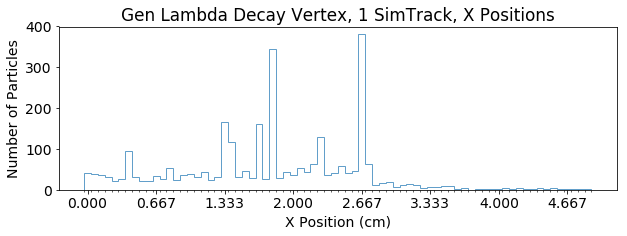

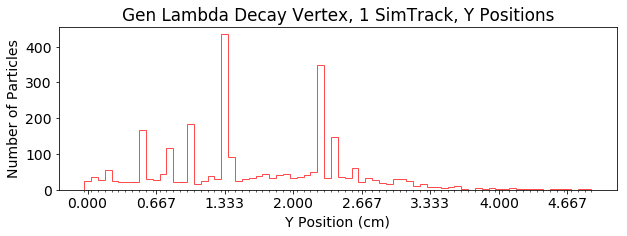

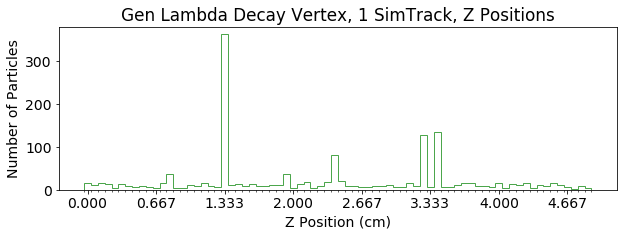

In [16]:
plotGenLambdaPos(dfonesim, "Gen Lambda Decay Vertex, 1 SimTrack")

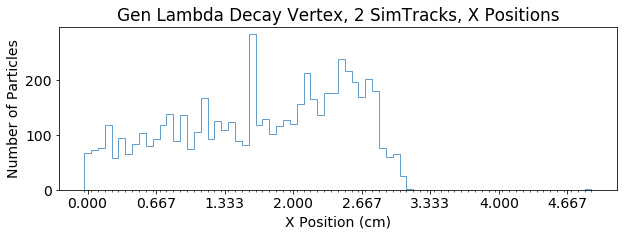

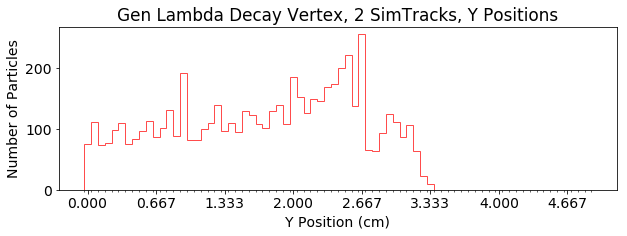

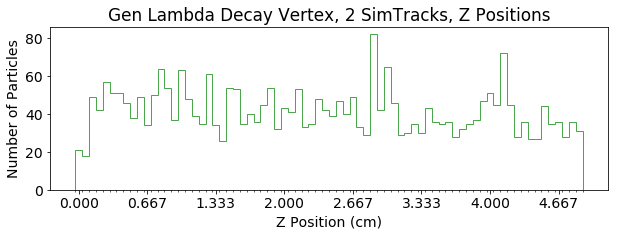

In [99]:
plotGenLambdaPos(dftwosim, "Gen Lambda Decay Vertex, 2 SimTracks")